# Projet : Fouille de Données
# Thème : Classification et clustering des tweets en Python.
# Réaliser par : Mannai Salim
<hr>

<img src="imgs/stylecloud.png" >


## Objectifs : 
* Maitriser l’API de twitter pour l’extraction des tweets
1. Maitriser la partie NLP (natural language processing) avec NLTK en Python
2. Appliquer les principes de nettoyage des données
3. Classer les tweets : regrouper ensemble les tweets qui sont similaires. C’est une étape qui peut être considérée comme une étape 

## Twitter

Twitter est un service de réseautage social et de micro-blogging sur lequel les utilisateurs publient et interagissent les uns avec les autres via des messages appelés «tweets». Il est classé au 6e rang des sites et applications de réseautage social les plus populaires par Dream Grow en avril 2020 avec une moyenne de 330 millions d'utilisateurs actifs par mois.


##  Spécifications

Imaginons que vous avez un compte Twitter, et que vous lez suivre les tweets (texte très court) sur ce
réseau social. Vu le nombre colossal de Tweets, et faute de temps, vous n’avez pas la possibilité de les
lire tous. Pour cela, vous avez besoin d’une application qui va jouer le rôle d’assistantet qui va vous
effectuer un résumé de toutes ces informations. Une des approches qu’on peut utiliser estde le classer
sous former de groupes de sorte à ce qu’on présente à l’utilisateur un seul Tweet de chaque groupe.
Pour cela, on doit procéder en trois grandes étapes :


1. Prétraitement des tweets

Dans cette étape, l’objectif est d’éliminer le texte inutile des tweets tels que les #, les noms des
utilisateurs, les url, …

2. Traitement des tweets : NLP (Natural LanguageProcessing)
On doit procéder à l’analyse du tweet en respectant les différentes étapes du NLP (Natural
LanguageProcessing). La bibliothèque à utiliser est NLTK en Python.

3. Classification des tweets
Etant donné un ensemble de tweets, l’objectif est de les résumer sous formes de groupes de sorte à
ce que les Tweets qui sont dans le même groupe soient similaires. Ainsi, l’utilisateur pourra par la
suite lire juste un Tweet de chaque groupe (le Tweet qui est le centroïde de groupes).

# Réalisation:




## Librairies

Les bibliothèques suivantes seront utilisées tout au long du projet.


In [1]:
#pip install tweepy
#!python -m spacy download en_core_web_sm
#!pip install spacy

In [2]:
import pandas as pd
import spacy
import en_core_web_sm
import tweepy
import numpy as np
import datetime
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

### Base de données
On va télécharger les Tweets à partir de Twitter en utilisant l’API de twitter. Pour cela, on doit obetenir  un
compte « Twitter Developer ».

In [3]:
auth = tweepy.OAuthHandler('aKIxg8MbtYW6lhDIWU9v2p8VA', 'wVSlCIfFQQigcJ1tssZjmrA98G5rQcj12y7iJbh0onDTBhT0ti')
auth.set_access_token('1328822985235591176-YL808qohOui7bkw5db669OwwxWFvH7', 'iN79ZSIIVXs1gv12meWlXZWoT9l0H1zMx0plgiFgo6mVF')

api = tweepy.API(auth, wait_on_rate_limit=True)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

McConnell urged Republican senators not to object when Congress ratifies presidential votes https://t.co/Ovjk92Y2MX https://t.co/pr4S9KRA0I
Hundreds of public servants and nonprofit employees across the U.S. are scrambling to unload hundreds of millions i… https://t.co/bqQweAyi6w
هجمات إلكترونية تخترق إدارات فيدرالية ومواقع وزارات أميركية، و #واشنطن تتهم #روسيا https://t.co/wItRwfzpGZ
President-elect Joe Biden has tapped Pete Buttigieg to lead the U.S. Transportation Department, making him the firs… https://t.co/ptuth78IAt
سيتي يكتفي بالتعادل على أرضه مع بروميتش
#سكاي_رياضة
https://t.co/kEv9bpAeXS
Vaccin contre le Covid-19: l'Agence européenne des médicaments sous pression https://t.co/1WKaT3SxdG https://t.co/ljrJbdvzZY
President-elect Joe Biden is poised to tap former Michigan Gov. Jennifer Granholm to lead the Department of Energy,… https://t.co/sZeDoYZNFt
Happy 6th birthday to #ThePinkprint &amp; thank you guys for rockin w|me 😘🎀🦄🎧
Google says looking into Gmail outage issue https:/

In [4]:
user = api.get_user('twitter')

In [5]:
print(user.screen_name)
print(user.followers_count)
for friend in user.friends():
   print(friend.screen_name)


Twitter
58696167
angnickelodeon


* Maintenant on va sauvgarder les tweets dansun fichier csv 
* j'ai choisit 12,000 tweets puisque on vas travailler avec 10,000 donc apres le 'Data cleaning' et sur tt le l'enlèvement des redondance le nombre vas se réduit.

In [ ]:

filename = 'Datasets/twitter_data_analysis'+(datetime.datetime.now().strftime("%Y-%m-%d-%H"))+'.csv'
with open (filename, 'w', newline='',encoding="utf-8") as csvFile:
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['date', 'TweetId','Tweet','created_at','geo','place','coordinates','location'])
    #using tweepy Cursor
    for tweet in tweepy.Cursor(api.search,q='#',lang="en",since="2020-10-01").items(12000):
        csvWriter.writerow([datetime.datetime.now().strftime("%Y-%m-%d  %H:%M"), tweet.id, tweet.text, tweet.created_at, tweet.geo, tweet.place.name if tweet.place else None, tweet.coordinates, tweet._json["user"]["location"]])


##### apres avoir télécharger les tweets , une dataframe vas etre creès pour q'on puisse manipuler ces données.

* Affichage de la taille du dataset (n_lignes and n_colonnes)


In [3]:
tweet_df= pd.read_csv('Datasets/twitter_data_analysis2020-12-11-21.csv')
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)
tweet_df.info()

Dataset size: (12000, 8)
Columns are: Index(['date', 'TweetId', 'Tweet', 'created_at', 'geo', 'place', 'coordinates',
       'location'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         12000 non-null  object
 1   TweetId      12000 non-null  int64 
 2   Tweet        12000 non-null  object
 3   created_at   12000 non-null  object
 4   geo          14 non-null     object
 5   place        143 non-null    object
 6   coordinates  14 non-null     object
 7   location     8120 non-null   object
dtypes: int64(1), object(7)
memory usage: 750.1+ KB


* Puisque on vas manipuler seulement les text des tweets , donc on vas garder que la colonne de l'identificateur des tweets et les texts des tweets.

In [4]:
df  = pd.DataFrame(tweet_df[['TweetId', 'Tweet']])


## Prétraitement

Les tweets contiennent des objets inutiles tels que des hashtags, des mentions, des liens et des signes de ponctuation qui peuvent affecter les performances d'un algorithme et doivent donc être supprimés. Tous les textes sont convertis en minuscules pour éviter que les algorithmes n'interprètent les mêmes mots avec des cas différents comme différents.

####  Dans cette partie a chaqye fois q'on va faire une action sur notre data frame on vas ajouter une autre colonne qui contienne le résultat de l'action ajouter

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

####  Supprimez les hashtags, les mentions et les caractères indésirables. 
1. Le texte généré par l'utilisateur a souvent des bizarreries et des bizarreries. Même au-delà de la conception et des contraintes d'une interface utilisateur particulière, les données textuelles peuvent simplement être difficiles. De plus, chaque fois qu'une plate-forme crée un nouveau phénomène comme #hashtags, @mentions, $ cashtags ou la possibilité de joindre des médias, elle introduit des modèles uniques de caractères dans les champs de texte associés.

In [9]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['Tweet'].apply(lambda x: remove_punct(x))
df.head(10)

,TweetId,Tweet,Tweet_punct
0,1337494412260069376,RT @milenialparadox: @KataiiKaminaDil @paras_c...,RT milenialparadox KataiiKaminaDil paraschhabr...
1,1337494412256038912,"RT @springday29: Summer, 2007 https://t.co/Co9...",RT springday Summer httpstcoCoXXsTtC
2,1337494412243456000,RT @crrdz_: I miss summer ☹️ https://t.co/NeDA...,RT crrdz I miss summer ☹️ httpstcoNeDArUF
3,1337494412243382279,RT @GamalMohsain: @nytimes Stop ethnic cleansi...,RT GamalMohsain nytimes Stop ethnic cleansing ...
4,1337494412239253506,@Postsubman The first mistake you made is not ...,Postsubman The first mistake you made is not k...
5,1337494412214079498,@AC1DTAB Jae how dare u bring her children in ...,ACDTAB Jae how dare u bring her children in th...
6,1337494412192956416,ma john cena come ha preso la choreo di dynami...,ma john cena come ha preso la choreo di dynami...
7,1337494412184707076,RT @EwdatsGROSS: Good morning https://t.co/kZk...,RT EwdatsGROSS Good morning httpstcokZkpBnARYc
8,1337494412172152838,RT @bigauideaigue: Why mecha and robots have a...,RT bigauideaigue Why mecha and robots have a p...
9,1337494412172124165,@LaurenJauregui Idk what time is for me but I’...,LaurenJauregui Idk what time is for me but I’m...


### Supprimez les emojies


In [10]:
import re

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text= emoji_pattern.sub(r'', text)
    return text
df['Tweet_emoji']= df['Tweet_punct'].apply(lambda x: remove_emoji(x))
df.head(10)

,TweetId,Tweet,Tweet_punct,Tweet_emoji
0,1337494412260069376,RT @milenialparadox: @KataiiKaminaDil @paras_c...,RT milenialparadox KataiiKaminaDil paraschhabr...,RT milenialparadox KataiiKaminaDil paraschhabr...
1,1337494412256038912,"RT @springday29: Summer, 2007 https://t.co/Co9...",RT springday Summer httpstcoCoXXsTtC,RT springday Summer httpstcoCoXXsTtC
2,1337494412243456000,RT @crrdz_: I miss summer ☹️ https://t.co/NeDA...,RT crrdz I miss summer ☹️ httpstcoNeDArUF,RT crrdz I miss summer httpstcoNeDArUF
3,1337494412243382279,RT @GamalMohsain: @nytimes Stop ethnic cleansi...,RT GamalMohsain nytimes Stop ethnic cleansing ...,RT GamalMohsain nytimes Stop ethnic cleansing ...
4,1337494412239253506,@Postsubman The first mistake you made is not ...,Postsubman The first mistake you made is not k...,Postsubman The first mistake you made is not k...
5,1337494412214079498,@AC1DTAB Jae how dare u bring her children in ...,ACDTAB Jae how dare u bring her children in th...,ACDTAB Jae how dare u bring her children in th...
6,1337494412192956416,ma john cena come ha preso la choreo di dynami...,ma john cena come ha preso la choreo di dynami...,ma john cena come ha preso la choreo di dynami...
7,1337494412184707076,RT @EwdatsGROSS: Good morning https://t.co/kZk...,RT EwdatsGROSS Good morning httpstcokZkpBnARYc,RT EwdatsGROSS Good morning httpstcokZkpBnARYc
8,1337494412172152838,RT @bigauideaigue: Why mecha and robots have a...,RT bigauideaigue Why mecha and robots have a p...,RT bigauideaigue Why mecha and robots have a p...
9,1337494412172124165,@LaurenJauregui Idk what time is for me but I’...,LaurenJauregui Idk what time is for me but I’m...,LaurenJauregui Idk what time is for me but I’m...


###  Tokenisation, lemmatisation et suppression des mots vides
* Une étape importante du traitement de texte consiste à diviser la chaîne en jetons (ou mots). Il existe de nombreuses façons de diviser une chaîne de texte en jetons (et de nombreuses bibliothèques de traitement de texte et de PNL pour vous aider à le faire). Pour les besoins de cette discussion, nous allons principalement nous intéresser à l’anglais. Dans ce cas, diviser le texte sur des espaces blancs est le moyen le plus simple de le faire. Les vectoriseurs de texte courants - comme ceux de scikit-learn - ont également des jetons un peu plus sophistiqués déjà intégrés que vous pouvez utiliser.


In [11]:
def tokenization(text):
    text = re.split(' ', text)
    return text

df['Tweet_tokenized'] = df['Tweet_emoji'].apply(lambda x: tokenization(x.lower()))
df.head()

,TweetId,Tweet,Tweet_punct,Tweet_emoji,Tweet_tokenized
0,1337494412260069376,RT @milenialparadox: @KataiiKaminaDil @paras_c...,RT milenialparadox KataiiKaminaDil paraschhabr...,RT milenialparadox KataiiKaminaDil paraschhabr...,"[rt, milenialparadox, kataiikaminadil, parasch..."
1,1337494412256038912,"RT @springday29: Summer, 2007 https://t.co/Co9...",RT springday Summer httpstcoCoXXsTtC,RT springday Summer httpstcoCoXXsTtC,"[rt, springday, summer, , httpstcocoxxsttc]"
2,1337494412243456000,RT @crrdz_: I miss summer ☹️ https://t.co/NeDA...,RT crrdz I miss summer ☹️ httpstcoNeDArUF,RT crrdz I miss summer httpstcoNeDArUF,"[rt, crrdz, i, miss, summer, , httpstconedaruf]"
3,1337494412243382279,RT @GamalMohsain: @nytimes Stop ethnic cleansi...,RT GamalMohsain nytimes Stop ethnic cleansing ...,RT GamalMohsain nytimes Stop ethnic cleansing ...,"[rt, gamalmohsain, nytimes, stop, ethnic, clea..."
4,1337494412239253506,@Postsubman The first mistake you made is not ...,Postsubman The first mistake you made is not k...,Postsubman The first mistake you made is not k...,"[postsubman, the, first, mistake, you, made, i..."


###  Supprimer les mots vides
* Une autre étape de traitement courante consiste à filtrer les mots qui sont suffisamment communs dans la langue pour qu'ils fournissent peu de valeur. Par exemple, en anglais, l'utilisation du 1 gramme «the» est peu susceptible de fournir un signal précieux dans une tâche de modélisation. De même, «la» ou «le» en français. Ces mots ou jetons peuvent en fait être un signal utile si vous essayez de créer un classificateur de langage textuel, mais ils peuvent également nous conduire à surajuster un modèle sur des mots à faible signal.

* Le choix d'une liste de mots vides adaptée au domaine et à la tâche est un exercice important et précieux qui n'a pas de réponse claire et «correcte». De nombreuses bibliothèques NLP incluent des listes de mots vides intégrées que vous pouvez utiliser, souvent prêtes à l'emploi, par exemple. NLTK et sklearn. Il vaut la peine d'examiner les choix spécifiques que chaque bibliothèque fait avec sa sélection de mots vides pour s'assurer qu'il correspond à vos objectifs et à vos attentes en matière d'inclusion ou de suppression de contenu.

In [12]:
stopword = nltk.corpus.stopwords.words('english')

In [13]:
stopword.extend(['old', 'new', 'age', 'lot', 'bag', 'top', 'cat','rt','the', 'bat', 'sap', 'jda', 'tea', 'dog', 'lie', 'law', 'lab',\
             'mob', 'map', 'car', 'fat', 'sea', 'saw', 'raw', 'rob', 'win', 'can', 'get', 'fan', 'fun', 'big',\
             'use', 'pea', 'pit','pot', 'pat', 'ear', 'eye', 'kit', 'pot', 'pen', 'bud', 'bet', 'god', 'tax', 'won', 'run',\
              'lid', 'log', 'pr', 'pd', 'cop', 'nyc', 'ny', 'la', 'toy', 'war', 'law', 'lax', 'jfk', 'fed', 'cry', 'ceo',\
              'pay', 'pet', 'fan', 'fun', 'usd', 'rio',':)', ';)', '(:', '(;', '}', '{','}','here', 'there', 'where', 'when', 'would', 'should', 'could','thats', 'youre', 'thanks', 'hasn',\
             'thank', 'https', 'since', 'wanna', 'gonna', 'aint', 'http', 'unto', 'onto', 'into', 'havent',\
             'dont', 'done', 'cant', 'werent', 'https', 'u', 'isnt', 'go', 'theyre', 'each', 'every', 'shes', 'youve', 'youll',\
            'weve', 'theyve','googleele' , 'goog', 'lyin', 'lie', 'googles', 'goog', 'aapl','apple',\
             'msft','microsoft', 'google', 'goog', 'googl','goog','https'])

In [14]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,TweetId,Tweet,Tweet_punct,Tweet_emoji,Tweet_tokenized,Tweet_nonstop
0,1337494412260069376,RT @milenialparadox: @KataiiKaminaDil @paras_c...,RT milenialparadox KataiiKaminaDil paraschhabr...,RT milenialparadox KataiiKaminaDil paraschhabr...,"[rt, milenialparadox, kataiikaminadil, parasch...","[milenialparadox, kataiikaminadil, paraschhabr..."
1,1337494412256038912,"RT @springday29: Summer, 2007 https://t.co/Co9...",RT springday Summer httpstcoCoXXsTtC,RT springday Summer httpstcoCoXXsTtC,"[rt, springday, summer, , httpstcocoxxsttc]","[springday, summer, , httpstcocoxxsttc]"
2,1337494412243456000,RT @crrdz_: I miss summer ☹️ https://t.co/NeDA...,RT crrdz I miss summer ☹️ httpstcoNeDArUF,RT crrdz I miss summer httpstcoNeDArUF,"[rt, crrdz, i, miss, summer, , httpstconedaruf]","[crrdz, miss, summer, , httpstconedaruf]"
3,1337494412243382279,RT @GamalMohsain: @nytimes Stop ethnic cleansi...,RT GamalMohsain nytimes Stop ethnic cleansing ...,RT GamalMohsain nytimes Stop ethnic cleansing ...,"[rt, gamalmohsain, nytimes, stop, ethnic, clea...","[gamalmohsain, nytimes, stop, ethnic, cleansin..."
4,1337494412239253506,@Postsubman The first mistake you made is not ...,Postsubman The first mistake you made is not k...,Postsubman The first mistake you made is not k...,"[postsubman, the, first, mistake, you, made, i...","[postsubman, first, mistake, made, knowing, pa..."
5,1337494412214079498,@AC1DTAB Jae how dare u bring her children in ...,ACDTAB Jae how dare u bring her children in th...,ACDTAB Jae how dare u bring her children in th...,"[acdtab, jae, how, dare, u, bring, her, childr...","[acdtab, jae, dare, bring, children, thisjk, i..."
6,1337494412192956416,ma john cena come ha preso la choreo di dynami...,ma john cena come ha preso la choreo di dynami...,ma john cena come ha preso la choreo di dynami...,"[ma, john, cena, come, ha, preso, la, choreo, ...","[john, cena, come, ha, preso, choreo, di, dyna..."
7,1337494412184707076,RT @EwdatsGROSS: Good morning https://t.co/kZk...,RT EwdatsGROSS Good morning httpstcokZkpBnARYc,RT EwdatsGROSS Good morning httpstcokZkpBnARYc,"[rt, ewdatsgross, good, morning, httpstcokzkpb...","[ewdatsgross, good, morning, httpstcokzkpbnaryc]"
8,1337494412172152838,RT @bigauideaigue: Why mecha and robots have a...,RT bigauideaigue Why mecha and robots have a p...,RT bigauideaigue Why mecha and robots have a p...,"[rt, bigauideaigue, why, mecha, and, robots, h...","[bigauideaigue, mecha, robots, place, fiction,..."
9,1337494412172124165,@LaurenJauregui Idk what time is for me but I’...,LaurenJauregui Idk what time is for me but I’m...,LaurenJauregui Idk what time is for me but I’m...,"[laurenjauregui, idk, what, time, is, for, me,...","[laurenjauregui, idk, time, i’m, lose, live, ]"


<hr>

##### On vas utiliser la bibliothèque NLTK pour effectuer une analyse de chaque tweet et le transformer en un ensemble de mots en  suivant les 

##### différentes étapes de base du processus NLP (Natural Language Processing)



* Stemming et Lammitization


In [15]:
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,TweetId,Tweet,Tweet_punct,Tweet_emoji,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,1337494412260069376,RT @milenialparadox: @KataiiKaminaDil @paras_c...,RT milenialparadox KataiiKaminaDil paraschhabr...,RT milenialparadox KataiiKaminaDil paraschhabr...,"[rt, milenialparadox, kataiikaminadil, parasch...","[milenialparadox, kataiikaminadil, paraschhabr...","[milenialparadox, kataiikaminadil, paraschhabr..."
1,1337494412256038912,"RT @springday29: Summer, 2007 https://t.co/Co9...",RT springday Summer httpstcoCoXXsTtC,RT springday Summer httpstcoCoXXsTtC,"[rt, springday, summer, , httpstcocoxxsttc]","[springday, summer, , httpstcocoxxsttc]","[springday, summer, , httpstcocoxxsttc]"
2,1337494412243456000,RT @crrdz_: I miss summer ☹️ https://t.co/NeDA...,RT crrdz I miss summer ☹️ httpstcoNeDArUF,RT crrdz I miss summer httpstcoNeDArUF,"[rt, crrdz, i, miss, summer, , httpstconedaruf]","[crrdz, miss, summer, , httpstconedaruf]","[crrdz, miss, summer, , httpstconedaruf]"
3,1337494412243382279,RT @GamalMohsain: @nytimes Stop ethnic cleansi...,RT GamalMohsain nytimes Stop ethnic cleansing ...,RT GamalMohsain nytimes Stop ethnic cleansing ...,"[rt, gamalmohsain, nytimes, stop, ethnic, clea...","[gamalmohsain, nytimes, stop, ethnic, cleansin...","[gamalmohsain, nytim, stop, ethnic, cleans, ge..."
4,1337494412239253506,@Postsubman The first mistake you made is not ...,Postsubman The first mistake you made is not k...,Postsubman The first mistake you made is not k...,"[postsubman, the, first, mistake, you, made, i...","[postsubman, first, mistake, made, knowing, pa...","[postsubman, first, mistak, made, know, partne..."


In [16]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_stemmed'].apply(lambda x: lemmatizer(x))
df.head()

,TweetId,Tweet,Tweet_punct,Tweet_emoji,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,1337494412260069376,RT @milenialparadox: @KataiiKaminaDil @paras_c...,RT milenialparadox KataiiKaminaDil paraschhabr...,RT milenialparadox KataiiKaminaDil paraschhabr...,"[rt, milenialparadox, kataiikaminadil, parasch...","[milenialparadox, kataiikaminadil, paraschhabr...","[milenialparadox, kataiikaminadil, paraschhabr...","[milenialparadox, kataiikaminadil, paraschhabr..."
1,1337494412256038912,"RT @springday29: Summer, 2007 https://t.co/Co9...",RT springday Summer httpstcoCoXXsTtC,RT springday Summer httpstcoCoXXsTtC,"[rt, springday, summer, , httpstcocoxxsttc]","[springday, summer, , httpstcocoxxsttc]","[springday, summer, , httpstcocoxxsttc]","[springday, summer, , httpstcocoxxsttc]"
2,1337494412243456000,RT @crrdz_: I miss summer ☹️ https://t.co/NeDA...,RT crrdz I miss summer ☹️ httpstcoNeDArUF,RT crrdz I miss summer httpstcoNeDArUF,"[rt, crrdz, i, miss, summer, , httpstconedaruf]","[crrdz, miss, summer, , httpstconedaruf]","[crrdz, miss, summer, , httpstconedaruf]","[crrdz, miss, summer, , httpstconedaruf]"
3,1337494412243382279,RT @GamalMohsain: @nytimes Stop ethnic cleansi...,RT GamalMohsain nytimes Stop ethnic cleansing ...,RT GamalMohsain nytimes Stop ethnic cleansing ...,"[rt, gamalmohsain, nytimes, stop, ethnic, clea...","[gamalmohsain, nytimes, stop, ethnic, cleansin...","[gamalmohsain, nytim, stop, ethnic, cleans, ge...","[gamalmohsain, nytim, stop, ethnic, clean, gen..."
4,1337494412239253506,@Postsubman The first mistake you made is not ...,Postsubman The first mistake you made is not k...,Postsubman The first mistake you made is not k...,"[postsubman, the, first, mistake, you, made, i...","[postsubman, first, mistake, made, knowing, pa...","[postsubman, first, mistak, made, know, partne...","[postsubman, first, mistak, made, know, partne..."


In [17]:
#!pip install wordcloud
#!pip install stylecloud

In [5]:
from wordcloud import WordCloud, ImageColorGenerator
import stylecloud
import cv2

# Start with one review:
tweet_All = " ".join(review for review in df['Tweet'].apply(lambda x: ' '.join(x)))

stylecloud123 =stylecloud.gen_stylecloud(tweet_All)

# Les Tweets Original 
<img src="imgs/stylecloud123.png" >

In [18]:
from wordcloud import WordCloud, ImageColorGenerator
import stylecloud
import cv2

# Start with one review:
tweet_All = " ".join(review for review in df['Tweet_lemmatized'].apply(lambda x: ' '.join(x)))

stylecloud =stylecloud.gen_stylecloud(tweet_All, icon_name= "fab fa-twitter")

# Les tweets aprés le traitement
<img src="imgs/stylecloud11.png" >

<hr>

####  L'ensemble de données après le prétraitement:

In [19]:
df.Tweet_lemmatized

0        [milenialparadox, kataiikaminadil, paraschhabr...
1                  [springday, summer, , httpstcocoxxsttc]
2                 [crrdz, miss, summer, , httpstconedaruf]
3        [gamalmohsain, nytim, stop, ethnic, clean, gen...
4        [postsubman, first, mistak, made, know, partne...
                               ...                        
11995         [, im, current, cri, want, jungkook, step, ]
11996    [worthwhilerandc, draw, nice, salari, daytoday...
11997    [itsdoctorjoel, alcohol, good, rx, ei, feel, e...
11998                          [louistomlinson, take, hat]
11999    [im, vote, quaranteammonstax, thelockdownaward...
Name: Tweet_lemmatized, Length: 12000, dtype: object

#### On va mettre les tweets propres dans un nouveau fichier csv

In [20]:
df.Tweet_lemmatized.to_csv('Datasets/new_tweets_clean.csv',index = False)

In [21]:
new_tweet_df= pd.read_csv('Datasets/new_tweets_clean.csv')
print('Dataset size:',new_tweet_df.shape)
print('Columns are:',new_tweet_df.columns)
new_tweet_df.info()
new_tweet_df.head()

Dataset size: (12000, 1)
Columns are: Index(['Tweet_lemmatized'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tweet_lemmatized  12000 non-null  object
dtypes: object(1)
memory usage: 93.9+ KB


,Tweet_lemmatized
0,"['milenialparadox', 'kataiikaminadil', 'parasc..."
1,"['springday', 'summer', '', 'httpstcocoxxsttc']"
2,"['crrdz', 'miss', 'summer', '', 'httpstconedar..."
3,"['gamalmohsain', 'nytim', 'stop', 'ethnic', 'c..."
4,"['postsubman', 'first', 'mistak', 'made', 'kno..."


## Vectorisation
- Les données nettoyées en une seule ligne en passant new_tweet_df dans le CountVectorizer
* La plupart des algorithmes d'apprentissage automatique prêts à l'emploi, par ex. dans sklearn, attendez l'entrée sous la forme d'une matrice de données bidimensionnelle de valeurs numériques: observations (lignes) x caractéristiques (colonnes). Pour créer une représentation numérique de données textuelles, nous devons vectoriser les fonctionnalités de texte (jetons), et des bibliothèques comme sklearn offrent de nombreuses façons de le faire.

* Pour cet exemple, nous utiliserons un vectoriseur qui normalise le nombre de jetons en fonction de la fraction de documents dans laquelle le jeton apparaît. Autrement dit, cela réduira la pondération des jetons qui apparaissent dans chaque document en supposant qu'ils ne sont pas spéciaux, et vice versa pour les jetons peu fréquents. Ce vectoriseur particulier gère également de manière pratique les étapes de prétraitement précédentes que nous avons décrites. En formatant nos étapes «supprimer les URL» et «tokeniser» en tant que fonctions, nous pouvons simplement les passer dans notre vectoriseur en tant qu'arguments de mots clés. De même, nous pouvons transmettre notre liste de mots vides personnalisée pour le filtrage. Il vaut la peine de considérer l'interaction entre la suppression pure et simple des mots vides (avec nos my_stopwords) et la réduction de pondération explicite que des mots extrêmement courants (comme «le» et «les») recevraient d'une vectorisation TFIDF. Ceci est une autre entrée dans «évaluer l'effet du choix pour votre cas d'utilisation» - ici, nous utilisons les deux pour l'augmentation de l'efficacité de calcul (moins de fonctionnalités).

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(new_tweet_df.Tweet_lemmatized)
print(X)

  (0, 17226)	1
  (0, 14815)	1
  (0, 20407)	1
  (0, 23626)	1
  (0, 14482)	1
  (0, 23257)	1
  (0, 14782)	1
  (0, 15695)	1
  (0, 3396)	1
  (0, 3418)	1
  (0, 20765)	1
  (0, 13824)	1
  (1, 24341)	1
  (1, 24794)	1
  (1, 9493)	1
  (2, 24794)	1
  (2, 4488)	1
  (2, 17338)	1
  (2, 11172)	1
  (3, 7588)	1
  (3, 19799)	1
  (3, 24609)	1
  (3, 6434)	1
  (3, 3812)	1
  (3, 7736)	1
  :	:
  (11996, 5720)	1
  (11996, 22744)	1
  (11996, 14411)	1
  (11996, 4431)	1
  (11996, 4389)	1
  (11996, 27732)	1
  (11996, 4900)	1
  (11996, 12402)	1
  (11997, 8019)	1
  (11997, 6850)	1
  (11997, 6045)	1
  (11997, 6157)	1
  (11997, 499)	1
  (11997, 22633)	1
  (11997, 13896)	1
  (11997, 24028)	1
  (11998, 25087)	1
  (11998, 16177)	1
  (11998, 8553)	1
  (11999, 13447)	1
  (11999, 27121)	1
  (11999, 25555)	1
  (11999, 21569)	1
  (11999, 15968)	1
  (11999, 19171)	1


# Classification des tweets

* Cette approche utilise la technique de création d'un ensemble de mots qui peuvent être classés en toute confiance comme  appartenant à une catégorie particulière .
## Sélection et réglage d'un modèle

* Il existe de nombreux types d'algorithmes de clustering disponibles dans le commerce via des bibliothèques comme sklearn. Bien que nous n'allions pas les traiter tous dans cette démo, nous comparerons quelques algorithmes différents.

 ###  KMeans

* KMeans est un choix courant car il est très rapide pour des quantités modérées de données. Comme la plupart des algorithmes, KMeans a des paramètres qui doivent être choisis de manière appropriée. 
* On va Utiliser l’algorithme K-Means pour classer les Tweets en 30 classes.



In [23]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(3,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration  0, inertia 160672.000
Iteration  1, inertia 100605.809
Converged at iteration 1: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 170041.000
Iteration  1, inertia 100210.620
Iteration  2, inertia 100083.864
Iteration  3, inertia 99989.625
Iteration  4, inertia 99976.645
Iteration  5, inertia 99927.014
Iteration  6, inertia 99659.859
Iteration  7, inertia 99391.035
Iteration  8, inertia 99389.667
Converged at iteration 8: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 136583.000
Iteration  1, inertia 100558.313
Iteration  2, inertia 100429.113
Iteration  3, inertia 100245.613
Iteration  4, inertia 100245.254
Converged at iteration 4: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 136797.000
Iteration  1, inertia 100601.776
Iteration  2, inertia 100600.265
Iteration  3, inertia 100599.327
Iter

Iteration  5, inertia 98073.159
Iteration  6, inertia 98043.299
Iteration  7, inertia 97902.877
Iteration  8, inertia 97893.847
Iteration  9, inertia 97893.797
Converged at iteration 9: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 112220.000
Iteration  1, inertia 99704.367
Iteration  2, inertia 99410.810
Iteration  3, inertia 99244.802
Iteration  4, inertia 98930.122
Iteration  5, inertia 98854.085
Iteration  6, inertia 98853.804
Converged at iteration 6: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 146282.000
Iteration  1, inertia 98780.347
Iteration  2, inertia 98569.771
Iteration  3, inertia 98537.684
Iteration  4, inertia 98514.909
Iteration  5, inertia 98513.290
Iteration  6, inertia 98513.069
Converged at iteration 6: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 123450.000
Iteration  1, inertia 99088.504
Iterati

Iteration  7, inertia 98617.067
Iteration  8, inertia 98612.836
Iteration  9, inertia 98611.114
Iteration 10, inertia 98608.884
Iteration 11, inertia 98602.268
Iteration 12, inertia 98587.056
Iteration 13, inertia 98575.945
Converged at iteration 13: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 112111.000
Iteration  1, inertia 99496.806
Iteration  2, inertia 99445.276
Converged at iteration 2: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 122878.000
Iteration  1, inertia 98580.597
Iteration  2, inertia 98576.695
Iteration  3, inertia 98572.965
Iteration  4, inertia 98561.913
Iteration  5, inertia 98465.106
Iteration  6, inertia 98446.184
Iteration  7, inertia 98444.801
Converged at iteration 7: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 124253.000
Iteration  1, inertia 100240.852
Iteration  2, inertia 100110.623
Iter

Iteration  4, inertia 97505.941
Iteration  5, inertia 97318.860
Iteration  6, inertia 97159.702
Iteration  7, inertia 97159.164
Converged at iteration 7: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 124422.000
Iteration  1, inertia 99003.984
Iteration  2, inertia 98197.768
Iteration  3, inertia 98095.005
Iteration  4, inertia 98070.537
Iteration  5, inertia 98020.688
Iteration  6, inertia 97919.329
Iteration  7, inertia 97722.555
Iteration  8, inertia 97668.139
Converged at iteration 8: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 110537.000
Iteration  1, inertia 98120.192
Iteration  2, inertia 97820.750
Iteration  3, inertia 97645.813
Iteration  4, inertia 97334.015
Iteration  5, inertia 97254.593
Iteration  6, inertia 97254.311
Converged at iteration 6: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 112296.000
Iterati

Iteration  0, inertia 124106.000
Iteration  1, inertia 98706.341
Iteration  2, inertia 97897.377
Iteration  3, inertia 97769.358
Iteration  4, inertia 97652.104
Iteration  5, inertia 97586.054
Iteration  6, inertia 97446.326
Iteration  7, inertia 97162.257
Iteration  8, inertia 97067.226
Iteration  9, inertia 97066.951
Converged at iteration 9: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 122423.000
Iteration  1, inertia 97428.911
Iteration  2, inertia 97014.958
Iteration  3, inertia 96661.241
Iteration  4, inertia 96635.652
Iteration  5, inertia 96470.142
Iteration  6, inertia 96412.491
Iteration  7, inertia 96411.086
Iteration  8, inertia 96410.777
Iteration  9, inertia 96410.670
Converged at iteration 9: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 109950.000
Iteration  1, inertia 97343.528
Iteration  2, inertia 97097.670
Iteration  3, inertia 96761.981
Iteration  4, ine

Converged at iteration 6: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 132103.000
Iteration  1, inertia 96438.839
Iteration  2, inertia 96189.873
Iteration  3, inertia 95985.633
Iteration  4, inertia 95663.891
Iteration  5, inertia 95586.235
Iteration  6, inertia 95539.655
Iteration  7, inertia 95408.968
Iteration  8, inertia 95354.732
Iteration  9, inertia 95348.910
Iteration 10, inertia 95348.489
Converged at iteration 10: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 121811.000
Iteration  1, inertia 97145.683
Iteration  2, inertia 96707.139
Iteration  3, inertia 96594.617
Iteration  4, inertia 96407.647
Iteration  5, inertia 96344.056
Iteration  6, inertia 96335.935
Iteration  7, inertia 96335.749
Converged at iteration 7: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 109790.000
Iteration  1, inertia 97290.177
Iterat

Iteration  4, inertia 96029.618
Iteration  5, inertia 95978.912
Iteration  6, inertia 95862.006
Iteration  7, inertia 95861.283
Converged at iteration 7: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 120744.000
Iteration  1, inertia 96764.478
Iteration  2, inertia 96340.315
Iteration  3, inertia 95810.241
Iteration  4, inertia 95445.194
Iteration  5, inertia 95270.722
Iteration  6, inertia 95264.872
Iteration  7, inertia 95264.800
Converged at iteration 7: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 121071.000
Iteration  1, inertia 96617.494
Iteration  2, inertia 96170.681
Iteration  3, inertia 95974.679
Iteration  4, inertia 95793.432
Iteration  5, inertia 95741.399
Iteration  6, inertia 95616.923
Iteration  7, inertia 95616.213
Converged at iteration 7: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 121743.000
Iterati

## Recherche de clusters optimaux
* Le clustering est une opération non supervisée et KMeans nécessite que nous spécifions le nombre de clusters. Une approche simple consiste à tracer le SSE pour une plage de tailles de cluster. Nous recherchons le «elbow» où l'ESS commence à se stabiliser. MiniBatchKMeans introduit du bruit, j'ai donc augmenté la taille des lots et des init. Malheureusement, la mise en œuvre régulière de Kmeans est trop lente. Vous remarquerez que différents états aléatoires généreront différents graphiques. Ici, j'ai choisi 30 clusters.

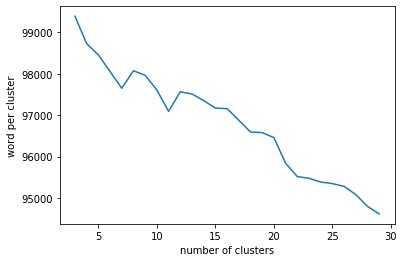

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(3,30),wcss)
plt.xlabel('number of clusters')
plt.ylabel('word per cluster')
plt.show()

### Tracer des clusters
* Ici, nous traçons les clusters générés par notre opération KMeans. Un graphique utilise PCA qui est meilleur pour capturer la structure globale des données. L'autre utilise TSNE qui est meilleur pour capturer les relations entre voisins. Afin d'accélérer le processus avec TSNE, j'échantillonne sur 8000 documents et j'effectue d'abord une réduction de dimension PCA 50 sur les données. Ensuite, je montre un nuage de points échantillonnant davantage l'échantillon jusqu'à 300 points.

Initialization complete
Iteration  0, inertia 109882.000
Iteration  1, inertia 97425.496
Iteration  2, inertia 97126.063
Iteration  3, inertia 96951.125
Iteration  4, inertia 96639.338
Iteration  5, inertia 96559.910
Iteration  6, inertia 96559.629
Converged at iteration 6: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 111665.000
Iteration  1, inertia 98982.534
Iteration  2, inertia 98728.876
Iteration  3, inertia 98355.249
Iteration  4, inertia 98213.876
Iteration  5, inertia 98191.503
Iteration  6, inertia 98189.009
Iteration  7, inertia 98188.324
Converged at iteration 7: center shift 0.000000e+00 within tolerance 2.967708e-08
Initialization complete
Iteration  0, inertia 122690.000
Iteration  1, inertia 98401.810
Iteration  2, inertia 98153.396
Iteration  3, inertia 98000.022
Iteration  4, inertia 97888.537
Iteration  5, inertia 97645.305
Iteration  6, inertia 97586.424
Iteration  7, inertia 97497.871
Iteration  8, inertia 971

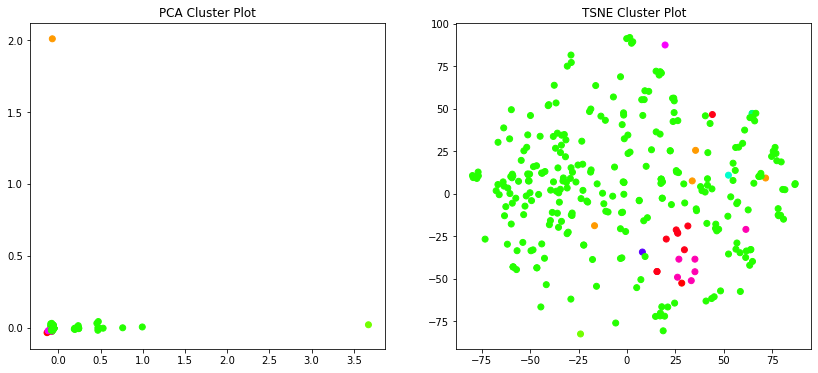

In [25]:
clusters = KMeans(n_clusters=20,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True).fit_predict(X)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=8000, replace=False) 
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X, clusters)

In [26]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Mots clés principaux
* Enfin, nous allons parcourir les clusters et imprimer les meilleurs mots-clés en fonction de leur score TFIDF pour voir si nous pouvons repérer des tendances. Je vais le faire en calculant une valeur moyenne pour toutes les dimensions dans Pandas, regroupées par l'étiquette de cluster. En utilisant numpy, trouver les premiers mots consiste simplement à trier les valeurs moyennes de chaque ligne et à prendre le N supérieur.

* Vous pouvez voir que nous avons un très bon résultat. Des sujets tels que l'exploitation des enfants, la fraude fiscale, les droits civils et les problèmes environnementaux peuvent être déduits des principaux mots clés. D'autres approches intéressantes à ce sujet pourraient inclure la modélisation de sujets LDA ou éventuellement le travail avec des incorporations de mots pré-entraînées.

In [27]:
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    print("-----------------------")
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")

Top terms per cluster:
Cluster 0:
-----------------------
 one
 thing
 day
 time
 know
 ever
 good
 life
 amp
 best

Cluster 1:
-----------------------
 like
 look
 feel
 follow
 amp
 don
 know
 retweet
 it
 peopl

Cluster 2:
-----------------------
 u200d
 what
 happen
 go
 time
 biden
 plan
 anim
 day
 massiv

Cluster 3:
-----------------------
 yakuza
 remast
 xbox
 celebr
 amp
 steam
 releas
 nto
 giveaway
 we

Cluster 4:
-----------------------
 vote
 livexl
 thelockdownaward
 btstwt
 quaranteammonstax
 quaranteambt
 im
 ni
 officialmonstax
 nim

Cluster 5:
-----------------------
 man
 year
 black
 today
 kill
 say
 fuck
 like
 said
 come

Cluster 6:
-----------------------
 ur
 amp
 year
 birthday
 officialsidnaaz
 day
 may
 louistomlinson
 life
 week

Cluster 7:
-----------------------
 want
 peopl
 xa0
 don
 know
 like
 make
 say
 one
 realli

Cluster 8:
-----------------------
 love
 much
 alway
 realli
 creat
 louistomlinson
 one
 see
 happi
 artist

Cluster 9:
-------------

## Dans cette partie on va pour chaque cluster  afficher un seul tweet 
* on a choisi d'afficher la tweet original sans aucune modification 


In [28]:
i=0
j=0
while i<28:
    while True: 
        Y=cv.transform([new_tweet_df.Tweet_lemmatized[j]])
        prediction=Kmeans.predict(Y)
        if i == prediction:
            print("Tweet of cluster "+str(prediction)+" : "+df.Tweet[j])
            print ("-----------------------------------------------")
            print("\n")
            j=0
            break
        j+=1
    i+=1

Tweet of cluster [0] : RT @TakeAShilllPill: I hope we all agree on this one frfr. https://t.co/wNFxO9WPgx
-----------------------------------------------


Tweet of cluster [1] : RT @GOPChairwoman: “But you know what real collusion looks like? It’s when left-leaning media, that is the media in general, decide en mass…
-----------------------------------------------


Tweet of cluster [2] : @Capitalntel At least 🤷‍♂️ guess we’ll just keep buying..
-----------------------------------------------


Tweet of cluster [3] : RT @thetojodojo: 🚨YAKUZA REMASTERED COLLECTION GIVEAWAY 🚨

To celebrate the Steam &amp; Xbox release of Yakuza Remastered we’re giving away a c…
-----------------------------------------------


Tweet of cluster [4] : RT @aerotycoon: @jbirch_12 @Ummismaelsf @ossoff @ReverendWarnock Vote!

Encourage everyone you know in Georgia to also vote!

Loeffler and…
-----------------------------------------------


Tweet of cluster [5] : RT @she_is_An0maly: when i see this year’s sp

<hr>

#  Tweets par catégorie
Nous souhaitons créer une dataframe contenant le nombre total de tweets par catégorie. Une base de données 4D avec la colonne d'index remplie d'utilisateurs et 3 autres colonnes contenant le nombre total de tweets de l'utilisateur dans les classes sociales, culturelles, sanitaires et économiques.
Cela peut être réalisé d'abord en créant un bloc de données contenant les scores Jaccard pour chaque tweet pour chaque catégorie, puis en attribuant un tweet à une catégorie en fonction du score le plus élevé et enfin en regroupant les tweets par nom d'utilisateur et somme des tweets.

<br>

### Ensembles de mots
Le bloc ci-dessous représente des mots liés à l'économie,social,culture et senté.

In [6]:
economy_related_words = "agriculture infrastructure capitalism trading service sector technology  economical supply industrialism efficiency frugality retrenchment downsizing   credit debit value economize   save  economically economies sluggish rise   rising spending conserve trend low-management  decline   industry impact poor  profession    surplus   fall declining  accelerating interest sectors balance stability productivity increase rates pushing expanding stabilize  rate industrial borrowing strugglingdeficit predicted    increasing  data economizer analysts investment market-based economy   debt free enterprise medium  exchange metric savepoint scarcity capital bank company stockholder fund business  asset treasury tourism incomes contraction employment jobs upturn deflation  macroeconomics bankruptcies exporters hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture capital mutual fund plan economy mortgage lender unemployment rate credit crunch central bank financial institution bank rate custom duties mass-production black-market developing-countries developing economic-growth gdp trade barter distribution downturn economist"
social_related_words = " emotion excuse shield creative persistence  enthusiastic self disciplined self-disciplined optimistic proactive courageous spiritual  positve attitude	monitor moods monitor behavior motivated school smar people smart  negative influences peer pressure personal best	achievement reading math belief systems  resilience"
culture_related_words = "arts humanities philosophy literature music painting beliefs ethos intellectual achievement intellectual achievements principles intellectual activity visual art fine art art, music, and literature lifestyle customs traditions habit background civilisationUK civilizationUS habits heritage mores society values ways life convention development ethnicity ethnology folklore folkways grounding humanism ideas knowledge arts and sciences the arts way of life community nation race tradition people origin ancestry ethnic group principles beliefs philosophy ethos lineage state population extraction pedigree clan tribe way of living nationality identity descent style of living parentage colorUS cultural group colourUK attainments achievements polity social order world the world the social order heredity roots racial type strain ethnic origin human activity mankind humanity humankind ethnic background rubric prescription rule custom past history ethnos situation condition naturalisationUK allegiance political home confederation body politic country affiliation residence native land enfranchisement ethnic minority naturalizationUS national status behaviourUK position regime conduct group routine behaviorUS populace fate lot existence station citizenry being doctrine essence circumstances circumstance manner of living activities personage business living kind kin progeny environment state of play daily life way of acting mode of living everyday life type region land realm standard of living set of circumstances empire commonwealth republic federation sovereignty organizationUS institution citizens political entity public union kingdom organisationUK fatherland motherland sovranty homeland residents inhabitants democracy territory power superpower domain micronation nation state sovereign state dominion principality monarchy nation-state res publica commonality general public collective klatch fold natives klatsch denizens burghers"
health_related_words =  "asthma band aid bandage be allergic to be constipated be exhausted be tired  blood blow one’s nose catch a cold chickenpox cough  crutch doctor faint family doctor feel dizzy feel good  feel sick flu get a bruiseget burnt have a cold have a cough have a headache have a rash have a sore throat have a stomach ache have a temperature have backache have constipationhave diarrhoea  have earache have spots have toothache heart attack heart disease hepatitis hospital hurt injection injury medicine mumps nurse painful painless pass out pill plaster prescription small pox sneeze suffer from swell take a medicine take an aspirin  throw up twist one’s ankle ulcer vaccine vomit wheelchair ound"

In [7]:
nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(nltk.corpus.stopwords.words('english'))
punctuation = list(string.punctuation) 
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
        if i.lower() not in stop:
            word1 = lemmatizer.lemmatize(i) 
            final_text.append(word1.lower())
    return " ".join(final_text)
df.Tweet = df.Tweet.apply(furnished)

Tout comme les tweets, ils doivent subir un pré-traitement. La fonction fournie utilisée sur les tweets est appliquée sur les sets.

In [8]:
economy = furnished(economy_related_words)
social = furnished(social_related_words)
culture = furnished(culture_related_words)
health = furnished(health_related_words)

Les doublons sont également supprimés:

In [9]:
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy
string1 = social
words = string1.split()
social = " ".join(sorted(set(words), key=words.index))
social
string1 = health
words = string1.split()
health = " ".join(sorted(set(words), key=words.index))
health
string1 = culture
words = string1.split()
culture = " ".join(sorted(set(words), key=words.index))
culture

'art humanity philosophy literature music painting belief ethos intellectual achievement principle activity visual fine art, music, lifestyle custom tradition habit background civilisationuk civilizationus heritage more society value way life convention development ethnicity ethnology folklore folkways grounding humanism idea knowledge science community nation race people origin ancestry ethnic group lineage state population extraction pedigree clan tribe living nationality identity descent style parentage colorus cultural colouruk attainment polity social order world heredity root racial type strain human mankind humankind rubric prescription rule past history ethnos situation condition naturalisationuk allegiance political home confederation body politic country affiliation residence native land enfranchisement minority naturalizationus national status behaviouruk position regime conduct routine behaviorus populace fate lot existence station citizenry doctrine essence circumstance ma

In [10]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores
e_scores = get_scores(economy, df.Tweet.to_list())
s_scores = get_scores(social, df.Tweet.to_list())
c_scores = get_scores(culture, df.Tweet.to_list())
h_scores = get_scores(health, df.Tweet.to_list())

In [11]:
# create a jaccard scored df.
data  = {'names':df.TweetId.to_list(),       'economic_score':e_scores,
         'social_score': s_scores, 'culture_score':c_scores, 'health_scores':h_scores}
scores_df = pd.DataFrame(data)
#assign classes based on highest score
def get_classes(l1, l2, l3, l4):
    econ = []
    socio = []
    cul = []
    heal = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            socio.append(1)
        else:
            socio.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)  
        if m == l:
            heal.append(1)
        else:
            heal.append(0)   
            
    return econ, socio, cul, heal
l1 = scores_df.economic_score.to_list()
l2 = scores_df.social_score.to_list()
l3 = scores_df.culture_score.to_list()
l4 = scores_df.health_scores.to_list()
econ, socio, cul, heal = get_classes(l1, l2, l3, l4)
data = {'name': scores_df.names.to_list(), 'economic':econ, 'social':socio, 'culture':cul, 'health': heal}
class_df = pd.DataFrame(data)
#grouping the tweets by username
new_groups_df = class_df.groupby(['name']).sum()
#add a new totals column
new_groups_df['total'] = new_groups_df['health'] + new_groups_df['culture'] + new_groups_df['social'] +  new_groups_df['economic']
#add a new totals row
new_groups_df.loc["Total"] = new_groups_df.sum()  

In [12]:
scores_df

,names,economic_score,social_score,culture_score,health_scores
0,1337494412260069376,0.636364,0.633333,0.656250,0.656250
1,1337494412256038912,0.486486,0.562500,0.542857,0.500000
2,1337494412243456000,0.447368,0.470588,0.459459,0.459459
3,1337494412243382279,0.555556,0.645161,0.571429,0.571429
4,1337494412239253506,0.638889,0.542857,0.567568,0.611111
...,...,...,...,...,...
11995,1337494373936877569,0.542857,0.484848,0.558824,0.558824
11996,1337494373936721921,0.657143,0.656250,0.676471,0.676471
11997,1337494373936689152,0.645161,0.703704,0.612903,0.666667
11998,1337494373928407041,0.433333,0.461538,0.448276,0.448276


In [13]:
new_groups_df

,economic,social,culture,health,total
name,,,,,
1337494373920071681,1,0,0,0,1
1337494373928407041,0,1,0,0,1
1337494373936689152,0,1,0,0,1
1337494373936721921,0,0,1,1,2
1337494373936877569,0,0,1,1,2
...,...,...,...,...,...
1337494412243382279,0,1,0,0,1
1337494412243456000,0,1,0,0,1
1337494412256038912,0,1,0,0,1


Vous trouverez ci-dessous un graphique à secteurs pour montrer les volumes de tweets dans les différentes catégories:

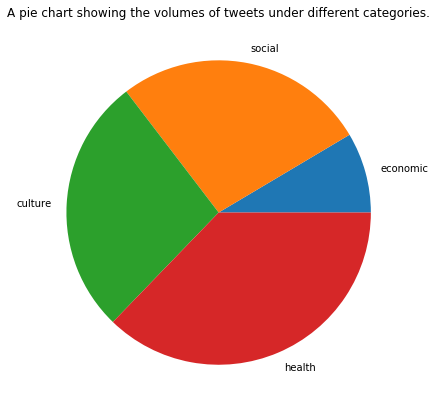

In [22]:
fig = plt.figure(figsize =(10, 7)) 
a = new_groups_df.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()

# Conclusion
<p>le plus grand pourcentage pour le secteur de santé cela pourrait être le résultat de la pandémie actuelle dont tout le monde parle ,ainsi que le secteur social puisque j'ai mis des  suivres pour plusieur page de cinema et music et de football  .
Les données peuvent être utilisées pour de nombreuses analyses et de belles visualisations, mais notre objectif de  est clustering des tweets.</p>